## 对温度分布频数进行统计 Calculate Frequency

In [211]:
# 排除掉脸部温度点小于400和大于500的样本
df_onlyface = df_onlyface[df_onlyface.count(axis=1)>400]
df_onlyface = df_onlyface[df_onlyface.count(axis=1)<500]

In [156]:
# 分成24个区间
N, bins = np.histogram(df_onlyface.iloc[10].dropna(), 25)

In [159]:
# 这个分割点会一直用它！
print('区间频数:', N)
print('分割点：', bins)

区间频数: [ 5.  3.  5.  1.  3.  4.  5.  3.  5.  2.  5.  6.  9.  3. 13. 15. 24. 25.
 39. 46. 52. 70. 67. 19.  6.]
分割点： [28.21597   28.4978672 28.7797644 29.0616616 29.3435588 29.625456
 29.9073532 30.1892504 30.4711476 30.7530448 31.034942  31.3168392
 31.5987364 31.8806336 32.1625308 32.444428  32.7263252 33.0082224
 33.2901196 33.5720168 33.853914  34.1358112 34.4177084 34.6996056
 34.9815028 35.2634   ]


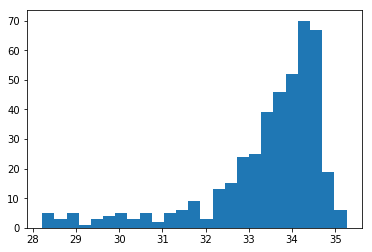

In [158]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1)
N, bins, patches = ax0.hist(np.array(df_onlyface.iloc[10].dropna()), bins=bins) # 使用相同的分割点
plt.show()

In [169]:
temDistribution = pd.DataFrame()
for i in df_onlyface.values:
    i = [j for j in i if not np.isnan(j)]
    N, _ = np.histogram(i, bins=bins)
    N_todf = pd.DataFrame(N).T
    temDistribution = pd.concat([temDistribution, N_todf])

In [206]:
temDistribution.index = [i for i in range(temDistribution.shape[0])]
temDistribution.columns = ["p{}".format(i) for i in range(temDistribution.shape[1])]
temDistribution

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24
0,2,11,6,3,5,4,8,7,10,3,...,12,16,19,28,44,58,61,59,51,21
1,13,3,3,6,5,4,3,4,2,4,...,15,30,21,28,57,66,58,62,44,16
2,6,5,4,4,6,5,5,6,3,4,...,18,18,20,34,60,63,63,51,36,12
3,4,7,4,4,8,6,3,7,8,3,...,6,15,21,26,53,54,46,51,42,14
4,7,7,5,8,7,3,3,10,8,9,...,12,17,28,37,43,58,55,35,28,7
5,4,7,4,3,0,6,5,7,9,4,...,14,24,21,33,57,50,50,58,31,9
6,9,0,2,1,1,3,5,5,8,6,...,12,20,26,34,40,57,72,58,28,10
7,4,2,4,4,4,0,1,5,4,5,...,22,18,23,34,46,50,77,50,28,6
8,4,4,3,3,2,2,4,4,3,11,...,14,21,12,33,36,47,69,59,46,15
9,6,3,4,3,4,3,4,8,5,5,...,15,22,26,29,45,60,67,59,29,8
